In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pickle

In [60]:
# Load the dataset
file_path = 'disease_symptom_data.csv'  # Replace with your Colab file path
disease_symptom_df = pd.read_csv(file_path)
disease_symptom_df

,disease_id,d_name,symptom_id,s_name
0,C0020538,Hypertensive Disease,C0008031,Pain Chest
1,C0020538,Hypertensive Disease,C0392680,Shortness Of Breath
2,C0020538,Hypertensive Disease,C0012833,Dizziness
3,C0020538,Hypertensive Disease,C0004093,Asthenia
4,C0020538,Hypertensive Disease,C0085639,Fall
...,...,...,...,...
1901,C0233472,Affect Labile,C0741453,Bedridden
1902,C0233472,Affect Labile,C0242453,Prostatism
1903,C0011127,Decubitus Ulcer,C0232257,Systolic Murmur
1904,C0011127,Decubitus Ulcer,C0871754,Frail


In [61]:
# One-hot encoding for symptoms
binary_features = pd.get_dummies(disease_symptom_df['symptom_id'])
disease_symptom_hotcoded = pd.concat(
    [disease_symptom_df['disease_id'], binary_features],
    axis=1
).groupby('disease_id').sum().reset_index()

# Display disease_symptom_hotcoded
disease_symptom_hotcoded

,disease_id,C0000727,C0000731,C0000737,C0002416,C0002962,C0003123,C0003126,C0003862,C0003962,...,C1320716,C1321756,C1384489,C1384606,C1405524,C1444773,C1456822,C1511606,C1513183,C1517205
0,C0001175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C0001418,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C0001511,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C0001973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C0002395,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,C1258215,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,C1456784,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,C1510475,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
131,C1565489,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [62]:
file_path = 'disease_symptom_hotcoded_train.csv'
disease_symptom_df_train = pd.read_csv(file_path)
disease_symptom_df_train

,disease_id,C0000727,C0000731,C0000737,C0002416,C0002962,C0003123,C0003126,C0003862,C0003962,...,C1320716,C1321756,C1384489,C1384606,C1405524,C1444773,C1456822,C1511606,C1513183,C1517205
0,C0001175,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C0001418,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C0001511,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C0001973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,C0002395,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C0024228,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,C0024299,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,C0024713,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,C0025202,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Encode labels (diseases)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(disease_symptom_df_train['disease_id'])
y_categorical = to_categorical(y)  # Convert to categorical format

In [64]:
# Compute class weights to handle class imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

In [65]:
# Prepare features
X = disease_symptom_df_train.drop(['disease_id'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [66]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

In [67]:
# Build the Dense Neural Network model
model = Sequential([
    # Input layer
    Input(shape=(X_train.shape[1],)),

    # Hidden layers with Batch Normalization and Dropout
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Output layer
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model with Adam optimizer and learning rate decay
optimizer = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [68]:
# Train the model with class weights
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1, class_weight=class_weights_dict)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.0330 - loss: 5.1086 - val_accuracy: 0.7800 - val_loss: 3.0610
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3868 - loss: 2.9148 - val_accuracy: 0.9650 - val_loss: 1.3699
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7356 - loss: 1.7594 - val_accuracy: 0.9875 - val_loss: 0.6003
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8434 - loss: 1.1840 - val_accuracy: 0.9975 - val_loss: 0.2804
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9084 - loss: 0.8087 - val_accuracy: 1.0000 - val_loss: 0.1476
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9446 - loss: 0.5602 - val_accuracy: 0.9975 - val_loss: 0.0890
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9622 - loss: 0.4382 - val_accuracy: 0.9975 - val_loss: 0.0544
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9713 - loss: 0.3342 - va

In [69]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=5)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.020243164151906967
Test Accuracy: 0.9950000047683716


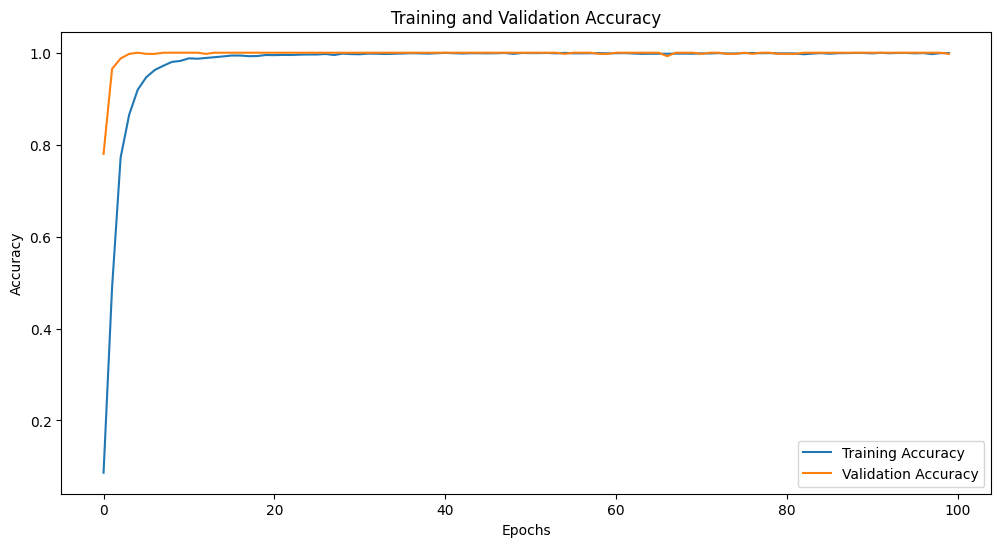

In [70]:
# Visualize training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

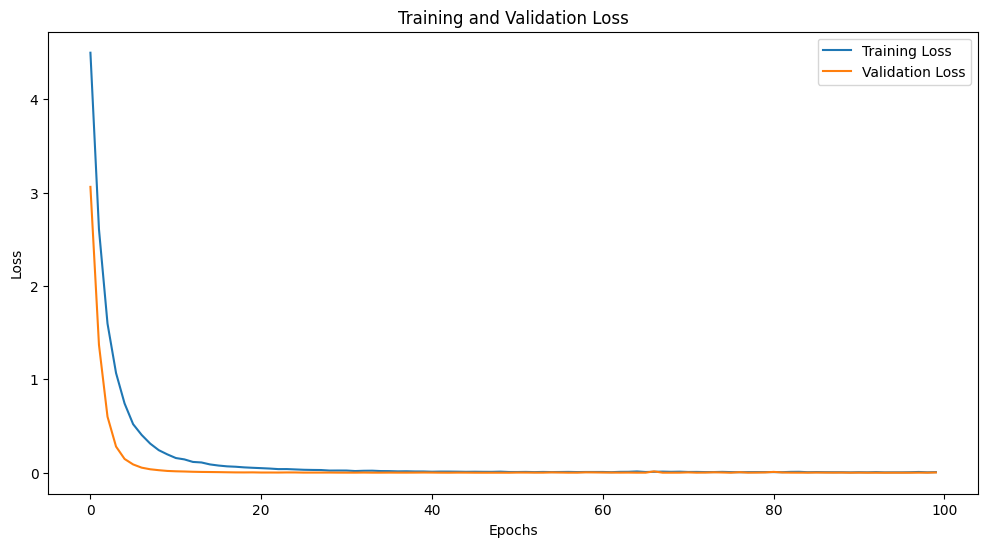

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [72]:
# Save the trained model to a file
model.save('disease_prediction_model.h5')  # Save as HDF5 format

In [73]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load the saved model
model = load_model('disease_prediction_model.h5')

In [74]:
# Load the dataset for reference
file_path = 'disease_symptom_data.csv'  # Replace with the actual file path
disease_symptom_df = pd.read_csv(file_path)

# Prepare the scaler using the original training data
binary_features = pd.get_dummies(disease_symptom_df['symptom_id'])
disease_symptom_hotcoded = pd.concat(
    [disease_symptom_df['disease_id'], binary_features],
    axis=1
).groupby('disease_id').sum().reset_index()

X = disease_symptom_hotcoded.drop(['disease_id'], axis=1)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [78]:
# Define selected symptoms
selectedSymptoms = ['C0085593', 'C0746619', 'C0030193', 'C0004093', 'C0004604']

# Print input symptoms with their names
print("Input Symptoms:")
for symptom_id in selectedSymptoms:
    symptom_name = disease_symptom_df.loc[disease_symptom_df['symptom_id'] == symptom_id, 's_name'].values
    symptom_name = symptom_name[0] if len(symptom_name) > 0 else "Unknown Symptom"
    print(f"Symptom ID: {symptom_id}, Name: {symptom_name}")

# Create test input in the same format as the training data
test_input = pd.DataFrame([{symptom_id: 1 for symptom_id in selectedSymptoms}], columns=X.columns).fillna(0)
test_input_scaled = scaler.transform(test_input)

# Make predictions using the trained model
probabilities = model.predict(test_input_scaled)
top_indices = np.argsort(probabilities[0])[-3:][::-1]  # Top 3 probabilities
top_diseases = [disease_symptom_df.loc[disease_symptom_df['disease_id'] == disease_id, 'd_name'].values[0]
                if len(disease_symptom_df.loc[disease_symptom_df['disease_id'] == disease_id, 'd_name'].values) > 0 else "Unknown Disease"
                for disease_id in np.array(disease_symptom_hotcoded['disease_id'])[top_indices]]
top_probabilities = [probabilities[0][i] for i in top_indices]

# Print top 3 predicted diseases
print("\nTop 3 Predicted Diseases:")
for i in range(len(top_diseases)):
    print(f"Disease ID: {top_indices[i]}, Name: {top_diseases[i]}, Probability: {top_probabilities[i]}")


Input Symptoms:
Symptom ID: C0085593, Name: Chill
Symptom ID: C0746619, Name: Monoclonal
Symptom ID: C0030193, Name: Pain
Symptom ID: C0004093, Name: Asthenia
Symptom ID: C0004604, Name: Pain Back
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Top 3 Predicted Diseases:
Disease ID: 5, Name: Anemia, Probability: 0.9771822094917297
Disease ID: 77, Name: Melanoma, Probability: 0.014222689904272556
Disease ID: 6, Name: Sickle Cell Anemia, Probability: 0.0024903318844735622


In [76]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
    # Save binary_features
with open('binary_features.pkl', 'wb') as f:
    pickle.dump(list(X.columns), f)


In [77]:
import tensorflow as tf
print(tf.__version__)


2.18.0
